In [1]:
import numpy as np
import biom
import pandas as pd
import random
import matplotlib.pyplot as plt
from biom.util import biom_open
from sklearn.preprocessing import scale
%matplotlib inline


### load and preprocess data

In [2]:
#define directory to read/write files
read_path = '/Users/bec5786/Desktop/temp/tempted_in'
save_path = '/Users/bec5786/Desktop/temp/tempted_out'

In [3]:
# load data
misame_mf = pd.read_csv('{}/Misame_CTF_sample_metadata.tsv'.format(read_path), sep='\t', index_col=0)
misame_table = biom.load_table('{}/Misame_raw2.hd5.biom'.format(read_path))
misame_df = misame_table.to_dataframe()
misame_array = misame_df.values

In [4]:
display(misame_mf.head())
misame_table

,SubjectID,VISIT,Timepoint,AGEDAYS,COUNTRY,STUDYID,SITEID,CITYTOWN,SUBJID,STUDYTYP,...,WAZ_M04_bins,HAZ_M04_bins,WAZ_M06_bins,HAZ_M06_bins,MBMI_AC4_bins,MBMI_M01_bins,MBMI_M04_bins,MHGB_AC3_bins,MHGB_Enroll_bins,SICK_M0_to_4
SampleID,,,,,,,,,,,,,,,,,,,,,
1421_611,15,BM Collection 14-21D,1,20,BURKINA FASO,MISAME-3,6,Hounde District,15,1,...,0 to 1,below -1,0 to 1,-1 to 0,18.5-25,18.5-25,18.5-25,10.5-11.5,<=10.5,False
pn12_611,15,BM Collection 1M-2M,2,67,BURKINA FASO,MISAME-3,6,Hounde District,15,1,...,0 to 1,below -1,0 to 1,-1 to 0,18.5-25,18.5-25,18.5-25,10.5-11.5,<=10.5,False
pn34_611,15,BM Collection 3M-4M,3,125,BURKINA FASO,MISAME-3,6,Hounde District,15,1,...,0 to 1,below -1,0 to 1,-1 to 0,18.5-25,18.5-25,18.5-25,10.5-11.5,<=10.5,False
1421_229,57,BM Collection 14-21D,1,31,BURKINA FASO,MISAME-3,2,Hounde District,57,1,...,below -1,-1 to 0,below -1,-1 to 0,18.5-25,18.5-25,18.5-25,10.5-11.5,11.5-12.5,False
pn12_229,57,BM Collection 1M-2M,2,62,BURKINA FASO,MISAME-3,2,Hounde District,57,1,...,below -1,-1 to 0,below -1,-1 to 0,18.5-25,18.5-25,18.5-25,10.5-11.5,11.5-12.5,False


37071 x 839 <class 'biom.table.Table'> with 30522605 nonzero entries (98% dense)

In [5]:
misame_table.to_dataframe().head()

,1421_101,1421_102,1421_103,1421_104,1421_106,1421_107,1421_108,1421_109,1421_111,1421_112,...,pn34_653,pn34_654,pn34_657,pn34_658,pn34_659,pn34_660,pn34_661,pn34_662,pn34_663,pn34_664
rLC_pos_mtb_4846337,614.0,384.0,319.0,294.0,251.0,314.0,250.0,404.0,298.0,293.0,...,271.0,283.0,395.0,386.0,403.0,352.0,303.0,210.0,243.0,196.0
rLC_pos_mtb_8977937,86.0,113.0,51.0,69.0,60.0,104.0,85.0,73.0,45.0,49.0,...,70.0,104.0,49.0,120.0,58.0,102.0,63.0,65.0,37.0,49.0
rLC_pos_mtb_6168557,586.0,319.0,445.0,263.0,278.0,464.0,228.0,243.0,400.0,637.0,...,461.0,225.0,358.0,288.0,280.0,222.0,347.0,424.0,379.0,331.0
rLC_pos_mtb_1208721,50.0,24.0,212.0,117.0,313.0,52.0,45.0,88.0,133.0,236.0,...,120.0,456.0,43.0,514.0,261.0,354.0,79.0,403.0,485.0,485.0
rLC_pos_mtb_9938192,635.0,431.0,395.0,568.0,465.0,535.0,398.0,438.0,361.0,447.0,...,510.0,369.0,672.0,356.0,448.0,600.0,562.0,458.0,432.0,491.0


In [6]:
print(misame_table.to_dataframe().isna().sum().sum())
print(misame_table.to_dataframe().isnull().sum().sum())
print(np.isnan(misame_array).sum())

0
0
0


In [9]:
#step 1: imputation
random.seed(5)
#draw from unif distribution with low=min(table)/10 and high=min(table)
zero_len = len(misame_array[misame_array==0])
min_value = misame_table.min().min()
rand_array = np.random.uniform(low=min_value/10, high=min_value, size=zero_len)
misame_array[misame_array==0] = rand_array
#sanity check
print(rand_array.min())
print(misame_array.min())

0.10000041229608538
0.10000041229608538


In [10]:
#step 2: log10 transform the data
misame_array = np.log10(misame_array)
print(misame_array)

[[2.78816837 2.58433122 2.50379068 ... 2.32221929 2.38560627 2.29225607]
 [1.93449845 2.05307844 1.70757018 ... 1.81291336 1.56820172 1.69019608]
 [2.76789762 2.50379068 2.64836001 ... 2.62736586 2.57863921 2.51982799]
 ...
 [5.55443828 6.23467948 5.70000066 ... 5.39610341 5.45523479 5.57417485]
 [6.31952703 6.40168326 6.32632275 ... 6.25038096 6.33930433 6.25103953]
 [6.33456392 6.4282291  6.35277334 ... 6.29703177 6.31853934 6.26128214]]


In [11]:
print(len(rand_array)) #579964
print(len(misame_array[misame_array<0])) #579964

579964
579964


In [12]:
#step 3: scale the data row-wise (feature-level)
misame_array_scaled = scale(misame_array, axis=1)
print(misame_array_scaled)

[[ 1.78790402  0.38494199 -0.16939918 ... -1.41911135 -0.98283403
  -1.62534101]
 [ 0.54910552  1.3566518  -0.99630768 ... -0.27890593 -1.94542628
  -1.1146277 ]
 [ 1.88838287 -0.16196996  0.96037138 ...  0.79738655  0.41910486
  -0.03746681]
 ...
 [ 0.49357931  2.13116235  0.84399986 ...  0.11241084  0.25476115
   0.54109227]
 [ 0.62311738  1.25964683  0.67576924 ...  0.08738801  0.77634785
   0.09249043]
 [ 0.41990709  1.29682197  0.59038782 ...  0.06852253  0.26988127
  -0.2661737 ]]


In [13]:
#step 4: turn back into biom table
table_transformed = biom.Table(misame_array_scaled, 
                               misame_df.index, 
                               misame_df.columns)
#save
with biom_open('{}/Misame_transformed.biom'.format(read_path), 'w') as f:  
   table_transformed.to_hdf5(f, 'sapient-norm')

In [19]:
#save transformed table as csv
table_transformed.to_dataframe().to_csv('{}/Misame_transformed.csv'.format(read_path))

/var/folders/wc/r9njmvn106j5gvr496l3xw65jl16p6/T/ipykernel_8804/3242813819.py:2: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  table_transformed.to_dataframe().to_csv('./Misame_transformed.csv')


### TEMPTED

In [13]:
from gemelli.tempted import (tempted_factorize, tempted)
#from gemelli.preprocessing import clr_transformation

In [14]:
print(table_transformed.to_dataframe().values[0:5,0:5])
print(table_transformed.to_dataframe().values.shape)

[[ 1.78790402  0.38494199 -0.16939918 -0.41334724 -0.88601117]
 [ 0.54910552  1.3566518  -0.99630768 -0.10227996 -0.51564072]
 [ 1.88838287 -0.16196996  0.96037138 -0.81280935 -0.6257978 ]
 [-1.36747554 -2.23036442  0.33082137 -0.3679979   0.78887344]
 [ 0.95466242 -0.44473397 -0.75971018  0.55200203 -0.17053894]]
(37071, 839)


In [15]:
min_sample_count=table_transformed.sum(axis='sample').min()
min_feature_count=table_transformed.sum(axis='observation').min()
print("Mins:", min_sample_count, min_feature_count)

Mins: -12940.065187746039 -6.857271417359811e-10


In [16]:
tempted_res = tempted(table=table_transformed.copy(), 
                      sample_metadata=misame_mf,
                      individual_id_column='SubjectID', 
                      state_column='Timepoint',
                      min_sample_count=min_sample_count,
                      min_feature_count=min_feature_count,
                      transformation=lambda x: x)

# Post feature (abs) filter:  (37071, 839)
# Post feature (freq) filter:  (37071, 839)
# Post sample filter:  (37071, 437)

Prop explained: [0.05254734 0.03547075 0.018763  ]
Prop explained argsort: [0 1 2]
Eigenvalues pre-sorting: [5530.10930842 5886.56160798 2889.23833787]
Eigenvalues post-sorting: [5530.10930842 5886.56160798 2889.23833787]


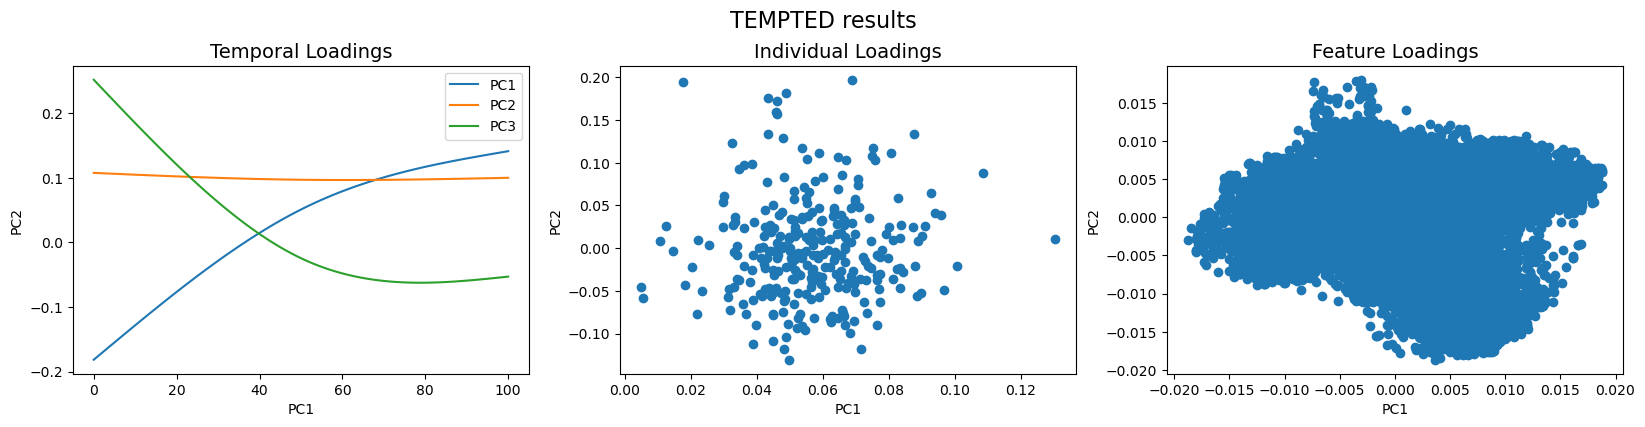

In [17]:
#feature loadings
comp1 = 'PC1'
comp2 = 'PC2'

fig, axn = plt.subplots(1, 3, figsize=(20, 4), sharey=False)
axn[0].plot(tempted_res[1][['PC1', 'PC2', 'PC3']])
axn[0].set_title('Temporal Loadings', fontsize=14)
axn[0].legend(['PC1', 'PC2', 'PC3'])
axn[1].scatter(tempted_res[0].samples[comp1],
               tempted_res[0].samples[comp2])
axn[1].set_title('Individual Loadings', fontsize=14)
axn[2].scatter(tempted_res[0].features[comp1],
               tempted_res[0].features[comp2])
axn[2].set_title('Feature Loadings', fontsize=14)
plt.suptitle('TEMPTED results', fontsize=16, y=1.02)
plt.setp(axn, xlabel=comp1.replace('_', ' '), 
         ylabel=comp2.replace('_', ' '))
plt.show()

In [18]:
# %%bash
# biom convert \
#   -i Misame_transformed.biom \
#   -o Misame_transformed.hd5.biom \
#   --to-hdf5

In [19]:
##save to dir
tempted_res[0].features.to_csv('{}/Misame_subject_ordination.csv'.format(save_path))
tempted_res[1].to_csv('{}/Misame_state_loadings.csv'.format(save_path))
# tempted_res[2].write('{}/Misame_distance_matrix.qza'.format(save_path))
# tempted_res[3].to_csv('{}/Misame_svd_center.csv'.format(save_path))